### Data Description

“Housing Affordability Data System” of the U.S. Department of Housing and Urban Development. [HADS]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("2013.csv", low_memory=False)

In [3]:
df

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,NUNITS,ROOMS,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
0,'100003130103',82,'3','1',73738,956,11067,2,2006,1,1,40000,1,6,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,-9
1,'100006110249',50,'5','3',55846,1100,24218,4,1980,1,1,130000,1,6,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,-9
2,'100006370140',53,'5','3',55846,1100,15470,4,1985,1,1,150000,1,7,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,-9
3,'100006520140',67,'5','3',55846,949,13964,3,1985,1,1,200000,1,6,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,-9
4,'100007130148',26,'1','3',60991,737,15492,2,1980,1,1,-6,100,4,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64530,'999900056779',55,'1','4',55929,556,12019,1,1930,1,1,-6,1,3,1,7000,'1',691,1,'2',141.333333,0.000000,691.000000,691.000000,691.000000,691.000000,0
64531,'999900056781',37,'1','2',73600,966,28229,2,1950,1,1,-6,1,5,5,74961,'1',0,1,'2',0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
64532,'999900056784',23,'2','4',86300,2701,15517,3,1940,1,1,-6,1,5,2,39974,'1',2215,1,'2',0.000000,15.000000,2215.000000,2215.000000,2215.000000,2215.000000,0
64533,'999900056785',57,'1','4',79659,770,12055,1,1930,1,1,-6,1,3,1,59987,'1',417,1,'2',77.083333,0.000000,417.000000,417.000000,417.000000,417.000000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CONTROL        64535 non-null  object 
 1   AGE1           64535 non-null  int64  
 2   METRO3         64535 non-null  object 
 3   REGION         64535 non-null  object 
 4   LMED           64535 non-null  int64  
 5   FMR            64535 non-null  int64  
 6   IPOV           64535 non-null  int64  
 7   BEDRMS         64535 non-null  int64  
 8   BUILT          64535 non-null  int64  
 9   STATUS         64535 non-null  int64  
 10  TYPE           64535 non-null  int64  
 11  VALUE          64535 non-null  int64  
 12  NUNITS         64535 non-null  int64  
 13  ROOMS          64535 non-null  int64  
 14  PER            64535 non-null  int64  
 15  ZINC2          64535 non-null  int64  
 16  ZADEQ          64535 non-null  object 
 17  ZSMHC          64535 non-null  int64  
 18  STRUCT

Use only the 2013 data.
Consider only ‘Single Family Housing’. 
TYPE = 1 and STRUCTURETYPE = 1 

In [5]:
df = df.copy()

In [6]:
df.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'IPOV', 'BEDRMS',
       'BUILT', 'STATUS', 'TYPE', 'VALUE', 'NUNITS', 'ROOMS', 'PER', 'ZINC2',
       'ZADEQ', 'ZSMHC', 'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST',
       'COST06', 'COST12', 'COST08', 'COSTMED', 'ASSISTED'],
      dtype='object')

In [7]:
df = df[['TYPE','STRUCTURETYPE','VALUE']]

In [8]:
df

,TYPE,STRUCTURETYPE,VALUE
0,1,1,40000
1,1,1,130000
2,1,1,150000
3,1,1,200000
4,1,5,-6
...,...,...,...
64530,1,1,-6
64531,1,1,-6
64532,1,1,-6
64533,1,1,-6


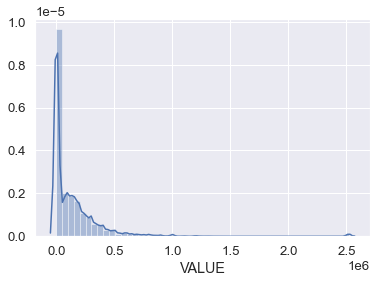

In [9]:
sns.distplot(df.VALUE);

In [10]:
df["VALUE"].value_counts()

-6          27389
 150000      1918
 200000      1817
 100000      1774
 80000       1524
            ...  
 1040000        1
 970000         1
 1130000        1
 1230000        1
 930000         1
Name: VALUE, Length: 117, dtype: int64

The VALUE variable may have a negative or very low value.

For our analysis we will delete all housing units which have a market value of less than 1,000$.

In [11]:
df = df[df["VALUE"] >= 1000]

In [12]:
df

,TYPE,STRUCTURETYPE,VALUE
0,1,1,40000
1,1,1,130000
2,1,1,150000
3,1,1,200000
6,1,1,260000
...,...,...,...
64509,1,1,400000
64511,1,1,380000
64512,1,1,410000
64514,1,1,350000


In [13]:
df.reset_index(inplace=True, drop=True)

In [14]:
df

,TYPE,STRUCTURETYPE,VALUE
0,1,1,40000
1,1,1,130000
2,1,1,150000
3,1,1,200000
4,1,1,260000
...,...,...,...
36670,1,1,400000
36671,1,1,380000
36672,1,1,410000
36673,1,1,350000


In [15]:
df["TYPE"].value_counts()

1    34979
2     1361
3      261
9       66
7        6
5        2
Name: TYPE, dtype: int64

In [16]:
df["STRUCTURETYPE"].value_counts()

1    32850
6     1622
2      858
3      578
5      521
4      246
Name: STRUCTURETYPE, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36675 entries, 0 to 36674
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TYPE           36675 non-null  int64
 1   STRUCTURETYPE  36675 non-null  int64
 2   VALUE          36675 non-null  int64
dtypes: int64(3)
memory usage: 859.7 KB


In [18]:
df['TYPE'] = df["TYPE"].astype('object')

In [19]:
df['STRUCTURETYPE'] = df["STRUCTURETYPE"].astype('object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36675 entries, 0 to 36674
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TYPE           36675 non-null  object
 1   STRUCTURETYPE  36675 non-null  object
 2   VALUE          36675 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 859.7+ KB


In [21]:
df.describe()

,VALUE
count,3.667500e+04
mean,2.499318e+05
std,2.866298e+05
min,1.000000e+04
25%,1.000000e+05
50%,1.800000e+05
75%,3.000000e+05
max,2.520000e+06


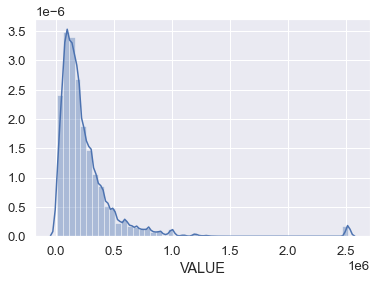

In [23]:
sns.distplot(a=df.VALUE);